In [1]:
import sys
!conda install --yes --prefix {sys.prefix} pandas

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
!conda install --yes --prefix {sys.prefix} numpy

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
!pip install sklearn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[ 67  50]
 [ 20 113]]


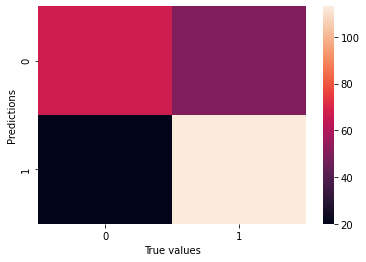

72.0


In [5]:
import numpy
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
nltk.download('stopwords')
L=[]
for i in range(0,1000):
    df= pd.read_csv('C:\\Users\\asus\\Downloads\\Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    L.append(review)
cv=CountVectorizer()
x=cv.fit_transform(L).toarray()
y=df.iloc[:,1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
r=(67+113)/(67+113+70)*100
print(r) 